# Done by:Genson Tan, Tan Kim Seng and Ding ang

# Predicting carplate prices

# Sample Collection


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
carplateData = pd.read_csv('CarplatePrices.csv')

In [3]:
carplateData.head()

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits
0,SKW52Z,SOLD,Carplate,52,2,SKW,Z,6,0,0
1,SGT5050J,SOLD,Carplate,5050,4,SGT,J,8,0,0
2,SV9955U,SOLD,Carplate,9955,4,SV,U,7,0,1
3,SBP7979Y,SOLD,Carplate,7979,4,SBP,Y,8,0,0
4,EF183P,SOLD,Carplate,183,3,EF,P,6,0,0


In [4]:
carplateData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3868 entries, 0 to 3867
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CarPlate                    3868 non-null   object
 1   Price                       3868 non-null   object
 2   Company                     3868 non-null   object
 3   Number                      3868 non-null   int64 
 4   Number of digits            3868 non-null   int64 
 5   Front Characters            3868 non-null   object
 6   Suffix characters           3868 non-null   object
 7   Total number of characters  3868 non-null   int64 
 8   Same digit througout        3868 non-null   int64 
 9   Sub repeated digits         3868 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 302.3+ KB


# Including features from outside the dataset. (Year-of-make dataset) for "Front Characters" Column

In [5]:
yearofmakeData = pd.read_csv('year of make.csv')
yearofmakeData.head()

,Prefix,Year,Month
0,EA,1972,(Aug)
1,EB,1973,(Mar)
2,EC,1973,(Oct)
3,ED,1974,(Mar)
4,EE,1975,(Feb)


# ---------------------------------------------------------------------------------------------------------------

# Data Preparation/ Cleaning

#Remove spaces in "CarPlate" column to standardize as they are all retrieved from different sources

In [6]:
carplateData['CarPlate']= carplateData['CarPlate'].str.replace(" ", "")

#Removing "SOLD", "POA" in Price column that does not add value to the dataset

In [7]:
carplateData = carplateData[~carplateData["Price"].str.contains("SOLD")] 
carplateData =carplateData[~carplateData["Price"].str.contains("POA")]




Removing "," in Prices for standardization and analysis

In [8]:
carplateData['Price']= carplateData['Price'].str.replace(",", "")

carplateData["Price"]= carplateData["Price"].astype(int) # Change object type of price to interger

In [9]:
carplateData.info()
carplateData

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3393 entries, 475 to 3867
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CarPlate                    3393 non-null   object
 1   Price                       3393 non-null   int32 
 2   Company                     3393 non-null   object
 3   Number                      3393 non-null   int64 
 4   Number of digits            3393 non-null   int64 
 5   Front Characters            3393 non-null   object
 6   Suffix characters           3393 non-null   object
 7   Total number of characters  3393 non-null   int64 
 8   Same digit througout        3393 non-null   int64 
 9   Sub repeated digits         3393 non-null   int64 
dtypes: int32(1), int64(5), object(4)
memory usage: 278.3+ KB


,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits
475,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0
476,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0
477,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0
478,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0
479,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0
...,...,...,...,...,...,...,...,...,...,...
3863,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0
3864,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0
3865,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1
3866,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0


In [10]:
carplateData = carplateData.reset_index(drop=True) #shifting datas up the empty rows that got remove
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0
...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0


# Adding extra features from our knowledge

See if the carplate number contain "8" , as "8" in chinese is auspicious

In [11]:
def checking_auspicious(row):
    for number in range(row['Number']):
        if '8' in str(row['Number']):
            return "Yes"
        else:
            return "No"


In [12]:
carplateData['Auspicious'] = carplateData.apply(checking_auspicious, axis=1)
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No


 Adding a column carplate's first letter might that helps with analysis

In [13]:
def first_letter(row):
    return row['Front Characters'][0]

In [14]:
carplateData['First Letter'] = carplateData.apply(first_letter, axis=1)
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No,E
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No,S
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes,S
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes,S
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No,E
...,...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F


Converting First letter into numerical data so data can be processed

In [15]:
def first_letter(row):
       return ord (row['Front Characters'][0]) - 65

In [16]:
carplateData['First_letter_Num'] = carplateData.apply(first_letter, axis=1)
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No,E,4
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No,S,18
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes,S,18
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes,S,18
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S,18
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S,18
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S,18
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F,5


Converting last character (Suffix) to numerical data so data can process numerical datas

In [17]:
Dict_number = {'A':1,'Z':2,'Y':3,'X':4,'U':5,'T':6,'S':7,'R':8,'P':9,'M':10,'L':11,'K':12,'J':13,'H':14,'G':15,'E':16,'D':17,'C':18,'B':19}
#following LTA sequences from 1 to 19
def suffix2number(row):
    return Dict_number.get(row['Suffix characters'])

In [18]:
carplateData['suffix_number'] = carplateData.apply(suffix2number, axis=1)
#convert suffix_number from float to int
carplateData["suffix_number"]= carplateData["suffix_number"].astype(float).astype('Int64')
carplateData["Price"]= carplateData["Price"].astype('Int64')
#carplateData[carplateData["suffix_number"].apply(lambda x: str(x).isdigit())] # drop non-interger row
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No,E,4,1
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No,S,18,3
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes,S,18,13
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes,S,18,19
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No,E,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S,18,18
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S,18,16
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S,18,14
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F,5,9


Checking for Antique Carplates that starts with Letter "E"

In [19]:
def checking_antique(row):
        if (row['First Letter'] == "E"):
            return 1
        else:
            return 0

In [20]:
carplateData['Antique'] = carplateData.apply(checking_antique, axis=1)
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number,Antique
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No,E,4,1,1
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No,S,18,3,0
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes,S,18,13,0
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes,S,18,19,0
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No,E,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S,18,18,0
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S,18,16,0
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S,18,14,0
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F,5,9,0


# Exploratory Data Analysis

Putting all of our features into heatmap correlation with the price

<AxesSubplot:>

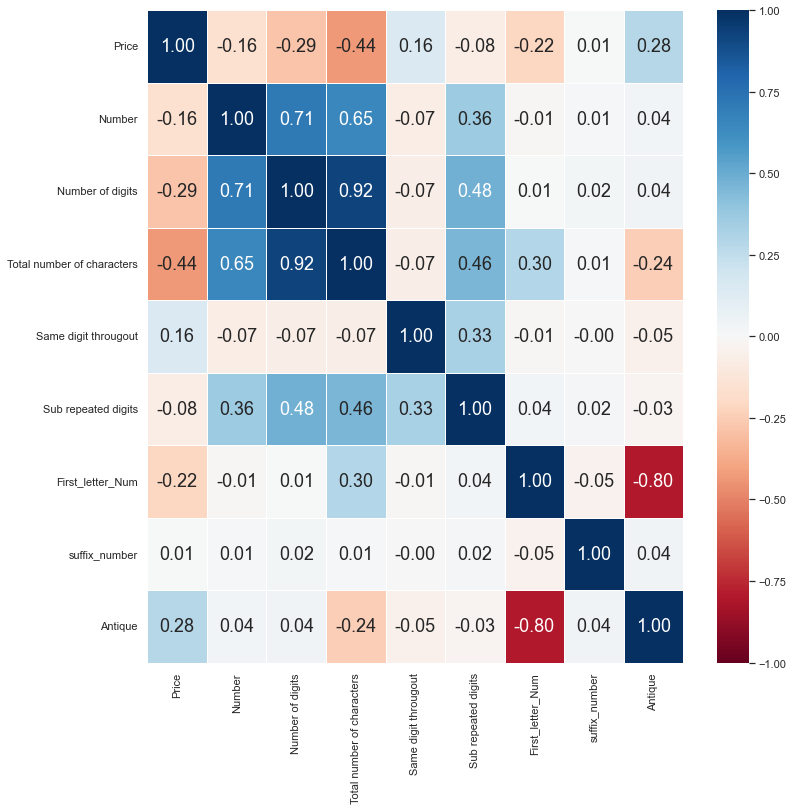

In [21]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(carplateData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")


With this correlation matrix, this shows that it the features has very poor correlation with price. Thus, the carprices are rather random and intuitive.
However, the highest correlation with price would the the Length of the carplate with a -0.44. It shows that if the length of the carplate is shorter,
the price would generally be more expensive.

Seeing how the prices are generally ranged

<AxesSubplot:xlabel='Price', ylabel='Count'>

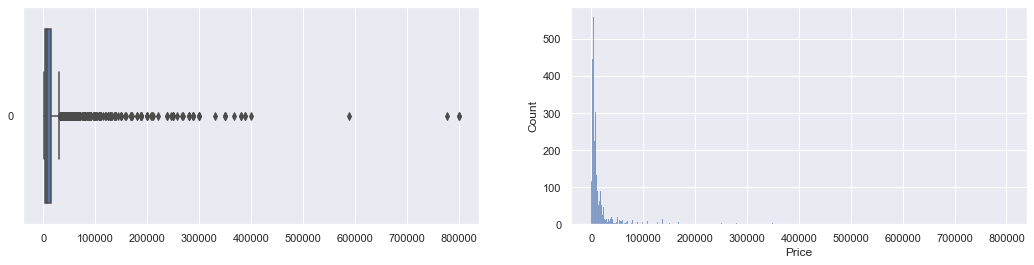

In [22]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = carplateData['Price'], orient = "h", ax = axes[0])
sb.histplot(data = carplateData['Price'], ax = axes[1])

We can roughly see that the prices of the carplates are generally more popular in the range of <$50,000

<AxesSubplot:xlabel='Number', ylabel='Count'>

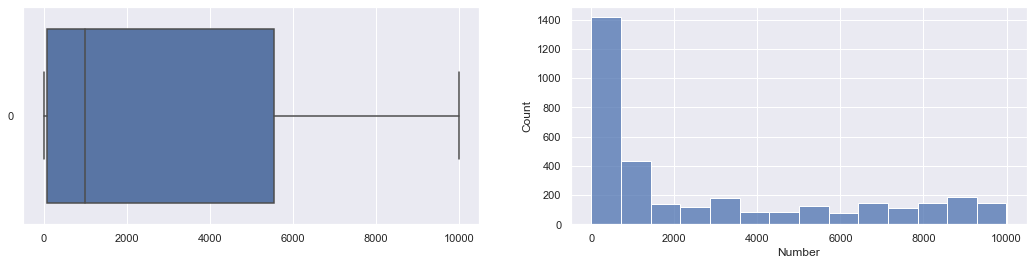

In [23]:
# different types of carplates
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = carplateData['Number'], orient = "h", ax = axes[0])
sb.histplot(data = carplateData['Number'], ax = axes[1])

we can observe that carplates number ranging from 0-1000 (3 digits or lesser) have higher in quantities listed to be sold

Using our own features, "Auspicious" to see how it relates to price

<AxesSubplot:xlabel='Price', ylabel='Auspicious'>

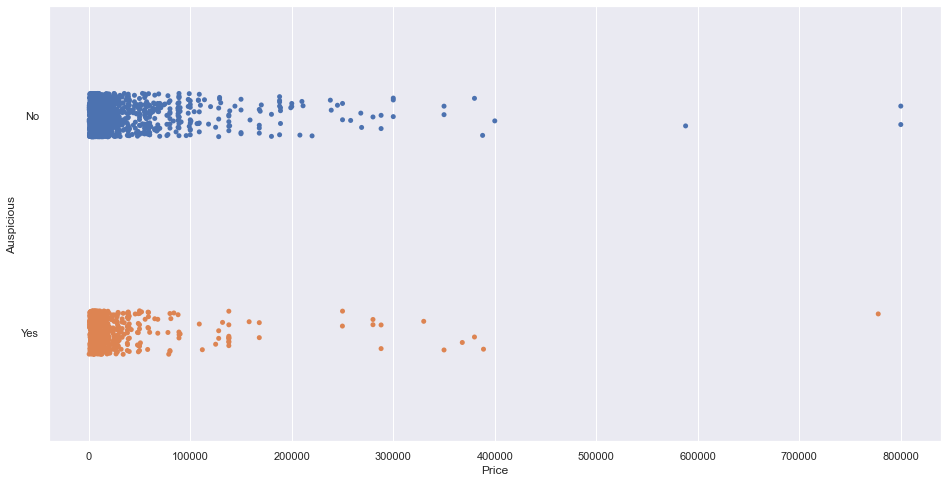

In [24]:
# Auspicious vs Price
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Price', y = 'Auspicious', data = carplateData)

Our own created feature 'Auspicious' does not really tell us how the prices differentitates from one another, as carplate number with 8 or not have roughly the same price range

Since length has the best relation to price, we can use stripplot to have a better visual understanding

<AxesSubplot:xlabel='Price', ylabel='Total number of characters'>

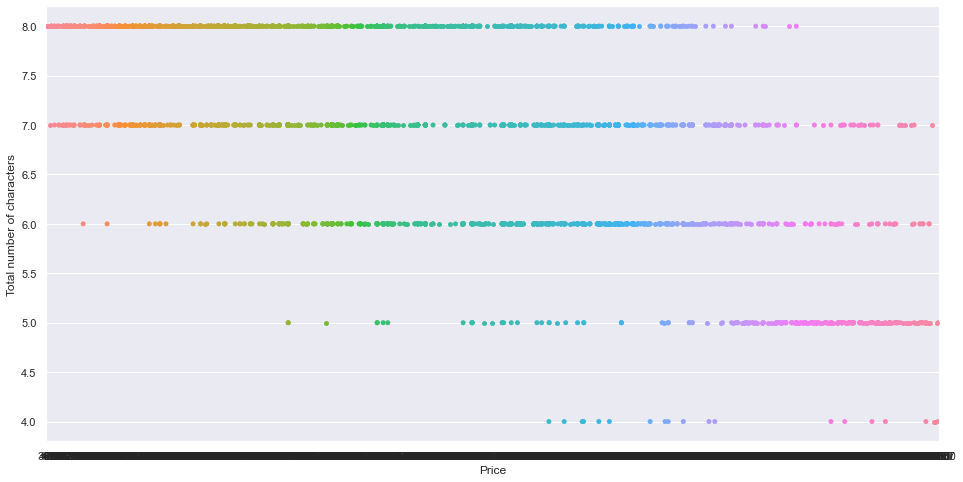

In [25]:
# Length vs Price
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Price', y = 'Total number of characters', data = carplateData)

To have a better idea of how the price are ranged at, we introduce natural sorting to seperate the prices into small blocks
Natural sorting will break up the prices based on the how compact the clustering would be on a graph for "Prices".

Using Natural Breaks with FisherJenks Algorithm; group numbers that are close together while also maxizming the distance between other groupings

In [26]:
import jenkspy
# the install with "conda install -c conda-forge jenkspy"

In [27]:
carplateData.sort_values(by='Price') #sorting in ascending order

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number,Antique
3392,SCX9896K,388,SGCarMart,9896,4,SCX,K,8,0,0,Yes,S,18,12,0
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F,5,9,0
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S,18,14,0
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S,18,16,0
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S,18,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,E60A,400000,Carplate,60,2,E,A,4,0,0,No,E,4,1,1
52,EW3L,588000,Carplate,3,1,EW,L,4,0,0,No,E,4,11,1
51,SB81E,777777,SGCarMart,81,2,SB,E,5,0,0,Yes,S,18,16,0
49,EC92J,800000,Carplate,92,2,EC,J,5,0,0,No,E,4,13,1


In [28]:
breaks = jenkspy.jenks_breaks(carplateData['Price'], nb_class=15)
print(breaks)

[388.0, 6400.0, 13000.0, 22222.0, 35000.0, 52000.0, 71000.0, 91000.0, 120000.0, 158888.0, 211111.0, 258000.0, 300000.0, 400000.0, 588000.0, 800000.0]


In [29]:
carplateData['Natural_break'] = pd.cut(
    carplateData['Price'],
    bins=jenkspy.jenks_breaks(carplateData['Price'], nb_class=15),
    labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], #breaking into 15 sub groups. label 1 = 388, label 2 = 6400, .. , label 15 = 800000
    include_lowest=True)

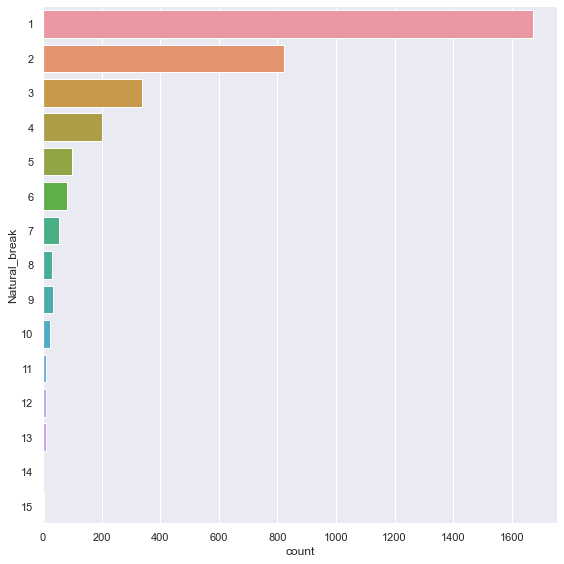

In [30]:
sb.catplot(y = "Natural_break", data = carplateData, kind = "count", height = 8) #Better idea of how the price range is distributed

Plotting the length vs Natural-break price

<AxesSubplot:xlabel='Natural_break', ylabel='Total number of characters'>

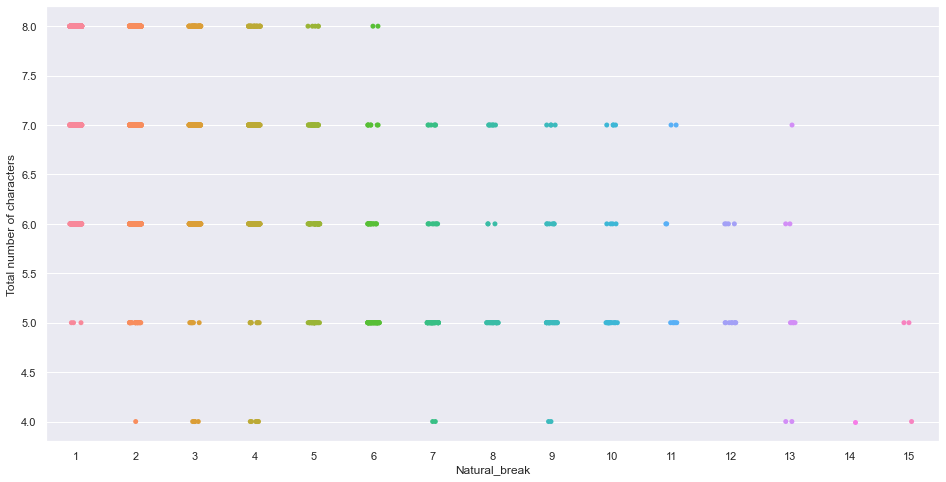

In [31]:
# Length vs Natural Break Price
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Natural_break', y = 'Total number of characters', data = carplateData)

We can better understand the price range on the graph

<AxesSubplot:xlabel='Price', ylabel='Antique'>

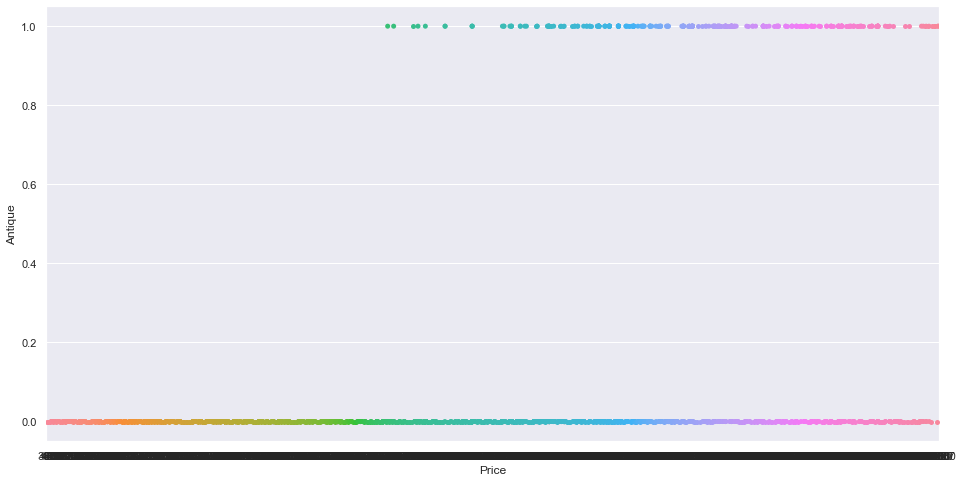

In [32]:
# Antique (2nd highest correlation) vs Price
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Price', y = 'Antique', data = carplateData)

Antique feature also shows us that antique cars are generally sold at a higher price as carplates that are antique are among the middle to high range

# ---------------------------------------------------------------------------------------------------------------

# Introducing Machine Learning

We will try linear regression with the 2 primary factors to predict the price which are length and antique of the carplate

In [33]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [92]:
def univariateLinearRegression(Xvar = None, yvar = None, df = None):
    '''
        Function to perform Linear Regression with Xvar and yvar in df.
        Prints the required plots within the function. Returns nothing.
    '''    
    # Extract Response and Predictors
    y = pd.DataFrame(df[yvar])
    X = pd.DataFrame(df[Xvar])

    # Split the Dataset into random Train and Test (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Print the coefficients of the Regression Line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = X_train
    regline_y = linreg.intercept_ + linreg.coef_ * X_train
    
    # Predict Response corresponding to Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)
    axes[0].set_title("Regression Line on Train Set")
    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].scatter(X_test, y_test_pred, color = "red")
    axes[1].set_title("Model Prediction on Test Set")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Prediction Accuracy of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

Intercept 	: b =  [163357.25858137]
Coefficients 	: a =  [[-20504.95276796]]


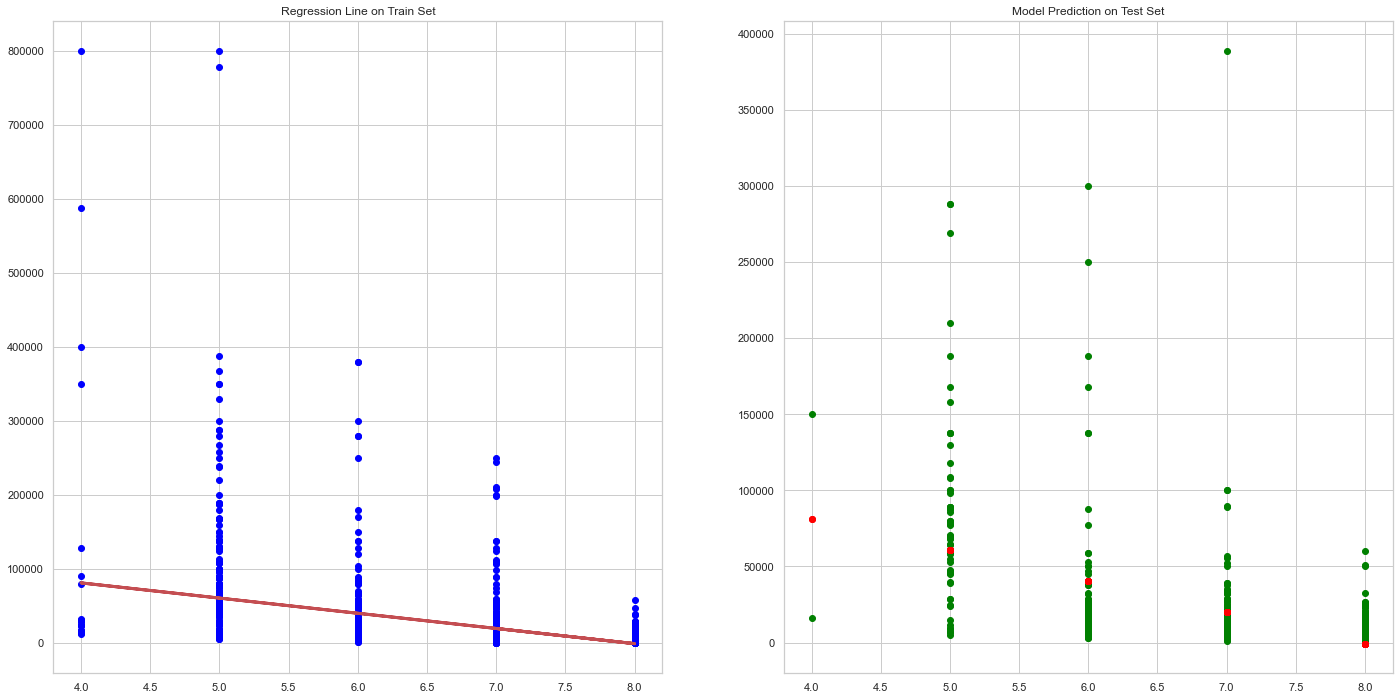

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18584535009845937
Mean Squared Error (MSE) 	: 1790448044.6756709

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2224427782677515
Mean Squared Error (MSE) 	: 1150533549.444608



In [93]:
univariateLinearRegression(Xvar = 'Total number of characters', yvar = "Price", df = carplateData)

The above results does not make logical sense to continue with linear regression as our model

But to clear our doubts, we will attempt multi-variate linear regression with antique feature


In [95]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split
import pandas as pd

# Extract Response and Predictors
y = pd.DataFrame(carplateData['Price'])
X = pd.DataFrame(carplateData[['Total number of characters']])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (2714, 1) (2714, 1)
Test Set  : (679, 1) (679, 1)


LinearRegression()

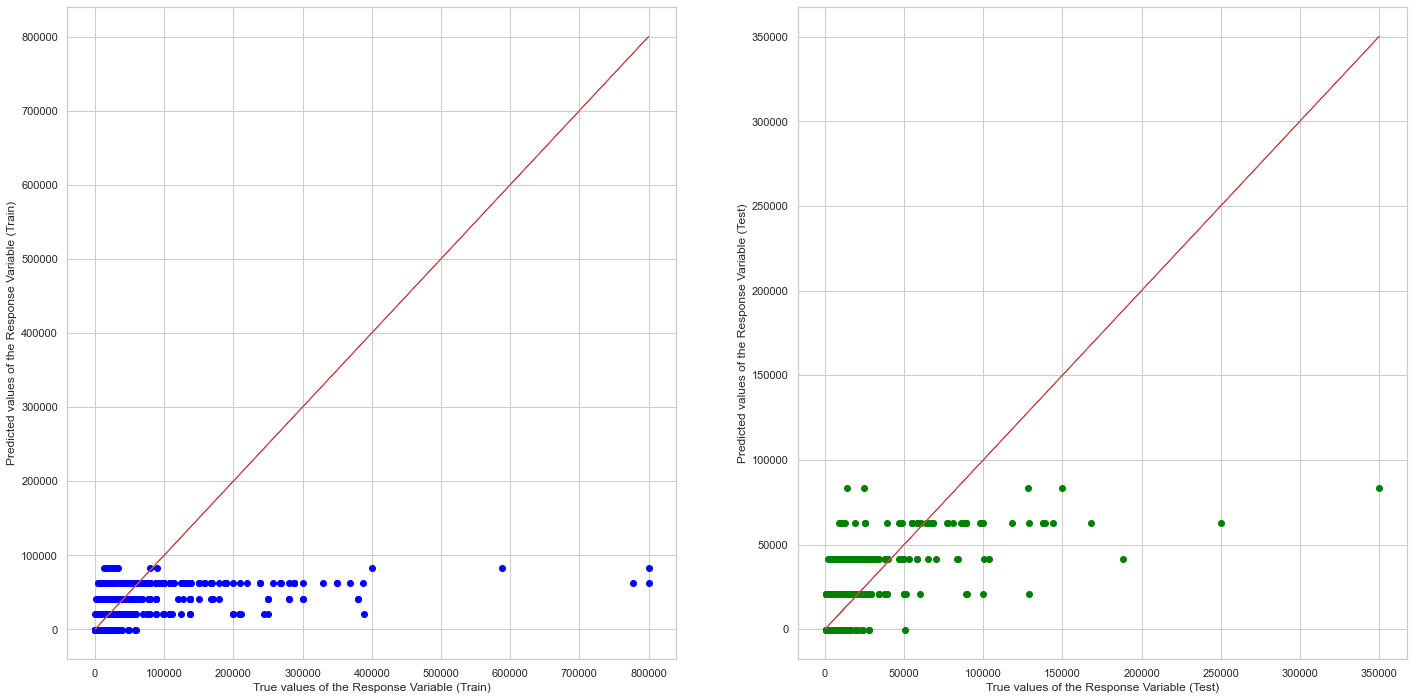

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18467008146404884
Mean Squared Error (MSE) 	: 1920949323.8613641

Prediction Accuracy of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2463665734653352
Mean Squared Error (MSE) 	: 635327182.5735035



In [96]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Prediction Accuracy of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

With the poor result, we will try to explore more varaibles that can help in other models

# Data Analysis

In [38]:
carplateData

,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number,Antique,Natural_break
0,EL70A,99000,CarPlateMart,70,2,EL,A,5,0,0,No,E,4,1,1,8
1,SE61Y,98000,CarPlateMart,61,2,SE,Y,5,0,0,No,S,18,3,0,8
2,SW85J,90000,CarPlateMart,85,2,SW,J,5,0,0,Yes,S,18,13,0,7
3,SNE80B,9300,CarPlateMart,80,2,SNE,B,6,0,0,Yes,S,18,19,0,2
4,ET6265Z,8300,CarPlateMart,6265,4,ET,Z,7,0,0,No,E,4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,SND3202C,488,SGCarMart,3202,4,SND,C,8,0,0,No,S,18,18,0,1
3389,SNE4321E,488,SGCarMart,4321,4,SNE,E,8,0,0,No,S,18,16,0,1
3390,SNE445H,445,SGCarMart,445,3,SNE,H,7,0,1,No,S,18,14,0,1
3391,FBF6976P,400,Carplate,6976,4,FBF,P,8,0,0,No,F,5,9,0,1


As number relates to length, higher the number would mean more digits present, sorting the number by order can help us explore more
We can also try using "First Letter" Column to distugsish antique carplates and other types

In [39]:
carplateData.sort_values(by='Number')


,CarPlate,Price,Company,Number,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number,Antique,Natural_break
141,SKD1X,113999,SGCarMart,1,1,SKD,X,5,0,0,No,S,18,4,0,8
92,SDW1D,188888,SGCarMart,1,1,SDW,D,5,0,0,No,S,18,17,0,10
93,SJF1Y,188000,Carplate,1,1,SJF,Y,5,0,0,No,S,18,3,0,10
91,SDW1D,188888,Carplate,1,1,SDW,D,5,0,0,No,S,18,17,0,10
94,SJF1Y,188000,SGCarMart,1,1,SJF,Y,5,0,0,No,S,18,3,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,SNF9999L,23200,CarPlateMart,9999,4,SNF,L,8,1,1,No,S,18,11,0,4
612,SLC9999B,21000,CarPlateMart,9999,4,SLC,B,8,1,1,No,S,18,19,0,3
515,SKL9999R,26000,CarPlateMart,9999,4,SKL,R,8,1,1,No,S,18,8,0,4
2175,FBB9999A,4999,Carplate,9999,4,FBB,A,8,1,1,No,F,5,1,0,1


Just from the above graph, we can see that carplate with number "1" are generally priced around the same range
Similar to "9999", that are ranged around 20k~ with the exception that same number carplates with different first letter has a different range

However, we can see that individual numbers and differing first letter can gives us a idea of the price range, with that, 
we can try non-linear regression to predict the prices as the 'number' has relation with the price but not linearly. 

# Non-Linear Regression (Uni-Variate) with 'Number' Column

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
data2 = carplateData[['Number', 'Price']].copy()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393 entries, 0 to 3392
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Number  3393 non-null   int64
 1   Price   3393 non-null   Int64
dtypes: Int64(1), int64(1)
memory usage: 56.5 KB


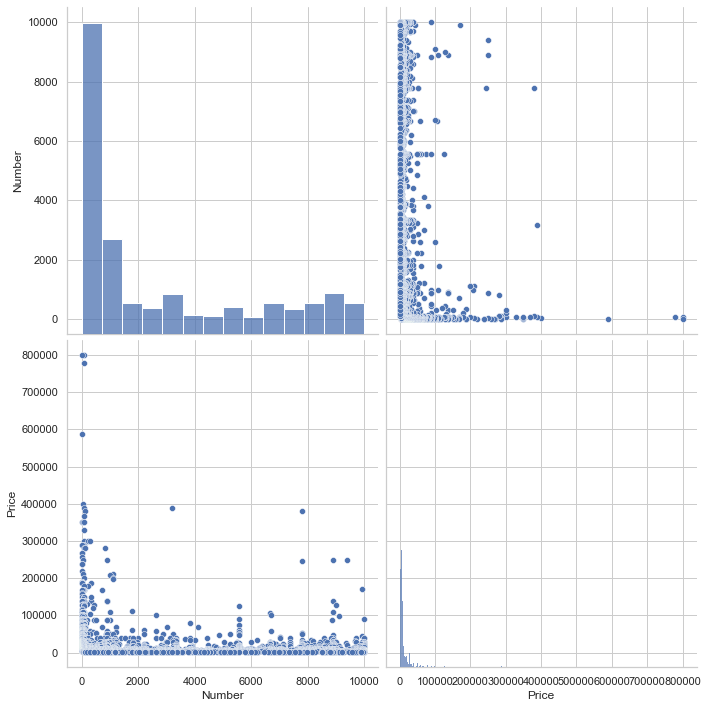

In [41]:
sns.set(style='whitegrid', context='notebook')
cols = ['Number', 'Price']
sns.pairplot(data2[cols], height=5)
plt.show()

A rough idea of how the regression curve would fit

In [42]:
data2

,Number,Price
0,70,99000
1,61,98000
2,85,90000
3,80,9300
4,6265,8300
...,...,...
3388,3202,488
3389,4321,488
3390,445,445
3391,6976,400


In [43]:
data2 = (data2 - data2.mean()) / data2.std() #Normalizing the data for non-linear regression
data2

,Number,Price
0,-0.849420,1.767944
1,-0.852155,1.745889
2,-0.844862,1.569449
3,-0.846381,-0.210385
4,1.033128,-0.23244
...,...,...
3388,0.102338,-0.404733
3389,0.442382,-0.404733
3390,-0.735464,-0.405682
3391,1.249188,-0.406674


(-2.0, 4.0, -1.5, 3.0)

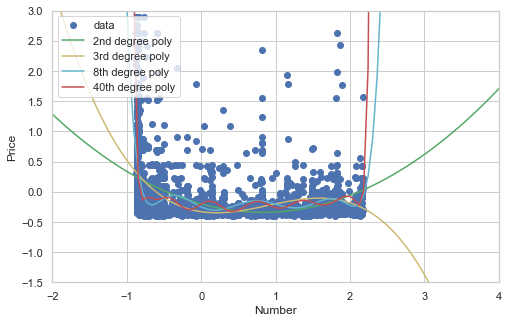

In [97]:
X = data2['Number'].astype(np.float64)
y = data2['Price'].astype(np.float64)

# fit the data with a 2nd degree polynomial
z2 = np.polyfit(X, y, 2) 
p2 = np.poly1d(z2) # construct the polynomial (note: that's a one in "poly1d")

# fit the data with a 3rd degree polynomial
z3 = np.polyfit(X, y, 3) 
p3 = np.poly1d(z3) # construct the polynomial

# fit the data with a 4th degree polynomial
z4 = np.polyfit(X, y, 4) 
p4 = np.poly1d(z4) # construct the polynomial

# fit the data with a 8th degree polynomial - just for the heck of it :-)
z8 = np.polyfit(X, y, 8) 
p8 = np.poly1d(z8) # construct the polynomial

# fit the data with a 16th degree polynomial - just for the heck of it :-)
z40 = np.polyfit(X, y, 16) 
p40 = np.poly1d(z40) # construct the polynomial

xx = np.linspace(-2, 4, 100)
plt.figure(figsize=(8,5))
plt.plot(X, y, 'o', label='data')
plt.xlabel('Number')
plt.ylabel('Price')
plt.plot(xx, p2(xx), 'g-', label='2nd degree poly')
plt.plot(xx, p3(xx), 'y-', label='3rd degree poly')
plt.plot(xx, p8(xx), 'c-', label='8th degree poly')
plt.plot(xx, p40(xx), 'r-', label='40th degree poly')
plt.legend(loc=2)
plt.axis([-2,4,-1.5,3]) # Use for higher degrees of polynomials

We can observe that the blue lin (8th degree polynomial) seem to fit the curve best

# Implementing Non-linear Regression

In [45]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [46]:
x = carplateData['Number'].astype(np.float64)
y = carplateData['Price'].astype(np.float64)

In [47]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 8)) #using 8th degree as discovered
myline = numpy.linspace(1, 9999)

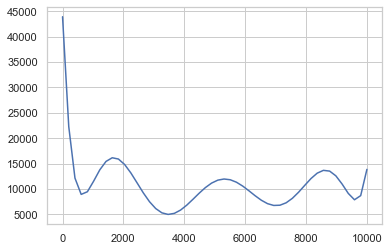

In [48]:
plt.plot(myline, mymodel(myline))

In [49]:
print("Explained Variance:", r2_score(y, mymodel(x))) #very poor r2

Explained Variance: 0.07571389250074534


Increasing the degree as the curve cant reach the price range on the top left of the graph (limited to 45K)

In [50]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 16)) #using 20th degree to reach the peak price of 800000k
myline = numpy.linspace(1, 9999)

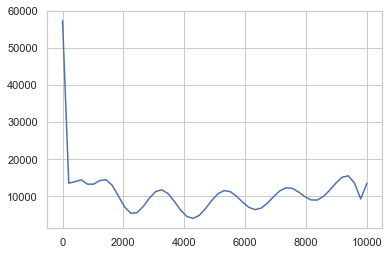

In [51]:
plt.plot(myline, mymodel(myline))

In [52]:
print("Explained Variance:", r2_score(y, mymodel(x))) #very poor r2

Explained Variance: 0.08796644256633535


We can see that even with 20th degree polynomial, the highest price range the curve could reach was 50-60K. 

We can conclude that we cant use non-linear regression because our data samples are quite large with no suitable curve and this model is not suitable for our dataset.


# Deep analysis of EDA

To workaround this issue, we found that we dont need a complicated model for our dataset. After deep analysis on our data, we find out that car numbers and type of make = first character are important features in predicting its prices and they are somewhat already categorized for us. 

# Using groupby to group and summarize record according to the split-apply-combine strategy

In [78]:
#Grouping and perform count over each group
dept_num =  carplateData.groupby('Number')['Number'].count()
print(dept_num)

Number
1       15
2       19
3       13
4        9
5       21
        ..
9994     2
9995     1
9996     3
9997     1
9999    10
Name: Number, Length: 1307, dtype: int64


In [79]:
#Group by two keys and then summarize each group
est_carprice =  carplateData.groupby(['Number'],as_index=False).Price.mean() #getting the average from unique categories

est_carprice = est_carprice.rename(columns ={'Price':'Estimated_Price'})
print(est_carprice)

      Number  Estimated_Price
0          1         167103.4
1          2     90871.157895
2          3    102900.615385
3          4     24960.444444
4          5      61742.47619
...      ...              ...
1302    9994           3338.0
1303    9995           3788.0
1304    9996      3555.333333
1305    9997           5000.0
1306    9999          27408.7

[1307 rows x 2 columns]


In [70]:
est_carprice

,Number,Estimated_Price
0,1,167103.4
1,2,90871.157895
2,3,102900.615385
3,4,24960.444444
4,5,61742.47619
...,...,...
1302,9994,3338.0
1303,9995,3788.0
1304,9996,3555.333333
1305,9997,5000.0


In [80]:
#function to add est_carprice to carpriceData2 merging
OverallDataset= pd.merge(est_carprice,carplateData)
OverallDataset

,Number,Estimated_Price,CarPlate,Price,Company,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First Letter,First_letter_Num,suffix_number,Antique,Natural_break
0,1,167103.4,SDH1H,268000,Carplate,1,SDH,H,5,0,0,No,S,18,14,0,12
1,1,167103.4,SNF1A,258000,SGCarMart,1,SNF,A,5,0,0,No,S,18,1,0,11
2,1,167103.4,SLZ1T,188888,Carplate,1,SLZ,T,5,0,0,No,S,18,6,0,10
3,1,167103.4,SDW1D,188888,Carplate,1,SDW,D,5,0,0,No,S,18,17,0,10
4,1,167103.4,SDW1D,188888,SGCarMart,1,SDW,D,5,0,0,No,S,18,17,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,9999,27408.7,SNF9999L,23200,CarPlateMart,4,SNF,L,8,1,1,No,S,18,11,0,4
3389,9999,27408.7,SKT9999Z,23000,SGCarMart,4,SKT,Z,8,1,1,No,S,18,2,0,4
3390,9999,27408.7,SLC9999B,21000,CarPlateMart,4,SLC,B,8,1,1,No,S,18,19,0,3
3391,9999,27408.7,FBG9999Z,5000,Carplate,4,FBG,Z,8,1,1,No,F,5,2,0,1


C:\Users\tanki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tanki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


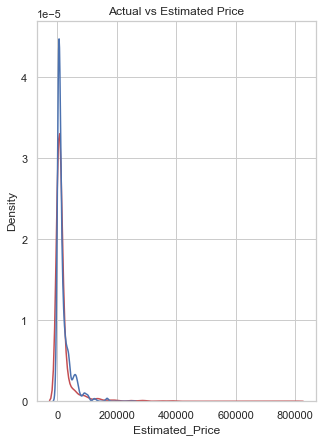

Explained Variance: 0.28543079034023955


C:\Users\tanki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\tanki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [81]:
plt.figure(figsize=(5, 7))


ax = sb.distplot(OverallDataset['Price'], hist=False, color="r", label="Actual Value")
sb.distplot(OverallDataset['Estimated_Price'], hist=False, color="b", label="Estimated Values" , ax=ax)


plt.title('Actual vs Estimated Price')


plt.show()
plt.close()
print("Explained Variance:", r2_score(OverallDataset['Price'],OverallDataset['Estimated_Price'])) #very poor r2

Adding "First letter" column to improve accuracy of estimation

In [83]:
#Group by two keys and then summarize each group
est_carprice =  carplateData.groupby(['Number','First Letter'],as_index=False).Price.mean()

est_carprice = est_carprice.rename(columns ={'Price':'Estimated_Price'})
print(est_carprice)

      Number First Letter  Estimated_Price
0          1            S    176682.214286
1          1            Y          33000.0
2          2            E         800000.0
3          2            F          12888.0
4          2            G          28000.0
...      ...          ...              ...
1557    9995            S           3788.0
1558    9996            S      3555.333333
1559    9997            S           5000.0
1560    9999            F           4999.5
1561    9999            S          33011.0

[1562 rows x 3 columns]


In [87]:
#using number and first letter to gauge the price
est_carprice

,Number,First Letter,Estimated_Price
0,1,S,176682.214286
1,1,Y,33000.0
2,2,E,800000.0
3,2,F,12888.0
4,2,G,28000.0
...,...,...,...
1557,9995,S,3788.0
1558,9996,S,3555.333333
1559,9997,S,5000.0
1560,9999,F,4999.5


In [88]:
#function to add est_carprice to carpriceData2 merging
OverallDataset= pd.merge(est_carprice,carplateData)


In [89]:
OverallDataset

,Number,First Letter,Estimated_Price,CarPlate,Price,Company,Number of digits,Front Characters,Suffix characters,Total number of characters,Same digit througout,Sub repeated digits,Auspicious,First_letter_Num,suffix_number,Antique,Natural_break
0,1,S,176682.214286,SDH1H,268000,Carplate,1,SDH,H,5,0,0,No,18,14,0,12
1,1,S,176682.214286,SNF1A,258000,SGCarMart,1,SNF,A,5,0,0,No,18,1,0,11
2,1,S,176682.214286,SLZ1T,188888,Carplate,1,SLZ,T,5,0,0,No,18,6,0,10
3,1,S,176682.214286,SDW1D,188888,Carplate,1,SDW,D,5,0,0,No,18,17,0,10
4,1,S,176682.214286,SDW1D,188888,SGCarMart,1,SDW,D,5,0,0,No,18,17,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,9999,S,33011.0,SKL9999R,26000,CarPlateMart,4,SKL,R,8,1,1,No,18,8,0,4
3389,9999,S,33011.0,SNF9999L,23888,Carplate,4,SNF,L,8,1,1,No,18,11,0,4
3390,9999,S,33011.0,SNF9999L,23200,CarPlateMart,4,SNF,L,8,1,1,No,18,11,0,4
3391,9999,S,33011.0,SKT9999Z,23000,SGCarMart,4,SKT,Z,8,1,1,No,18,2,0,4


C:\Users\tanki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\tanki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


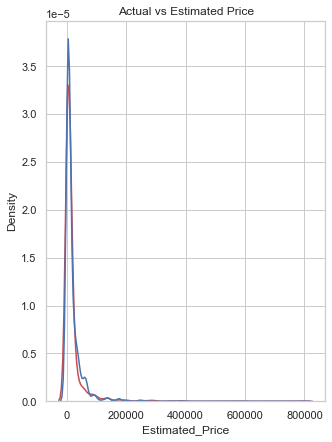

Explained Variance: 0.581272960896299


C:\Users\tanki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\tanki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [98]:
plt.figure(figsize=(5, 7))


ax = sb.distplot(OverallDataset['Price'], hist=False, color="r", label="Actual Value")
sb.distplot(OverallDataset['Estimated_Price'], hist=False, color="b", label="Estimated Values" , ax=ax)


plt.title('Actual vs Estimated Price')


plt.show()
plt.close()
print("Explained Variance:", r2_score(OverallDataset['Price'],OverallDataset['Estimated_Price'])) #very poor r2

The groupby method had a close to 0.6 variance comparing the estimated price and actual price which is quite sufficient for us in this case

# CONCLUSION

In the end, we managed to predict the price with deep EDA on the dataset as our dataset is very poor to begin with. 
After improving the dataset with our own added features, we get to understand how carplates are priced at a certain range and 
this still ultimately gives us a solution in allowing buyers and seller to know a rough gauge of the price to not be short-changed when dealing with transcations
